In [12]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [13]:
# Load & Preprocess the Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [16]:
# Build the CNN Model

model = Sequential([
    Input(shape=(28, 28, 1)),  # Define input shape here
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Train the Model
history = model.fit(x_train, y_train_encoded, epochs=5, batch_size=128, validation_data=(x_test, y_test_encoded))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.8688 - loss: 0.4690 - val_accuracy: 0.9745 - val_loss: 0.0842
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9783 - loss: 0.0749 - val_accuracy: 0.9817 - val_loss: 0.0571
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9857 - loss: 0.0489 - val_accuracy: 0.9833 - val_loss: 0.0517
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9892 - loss: 0.0354 - val_accuracy: 0.9859 - val_loss: 0.0430
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9930 - loss: 0.0246 - val_accuracy: 0.9866 - val_loss: 0.0418


In [18]:
# Evaluate & Visualize Performance
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9866


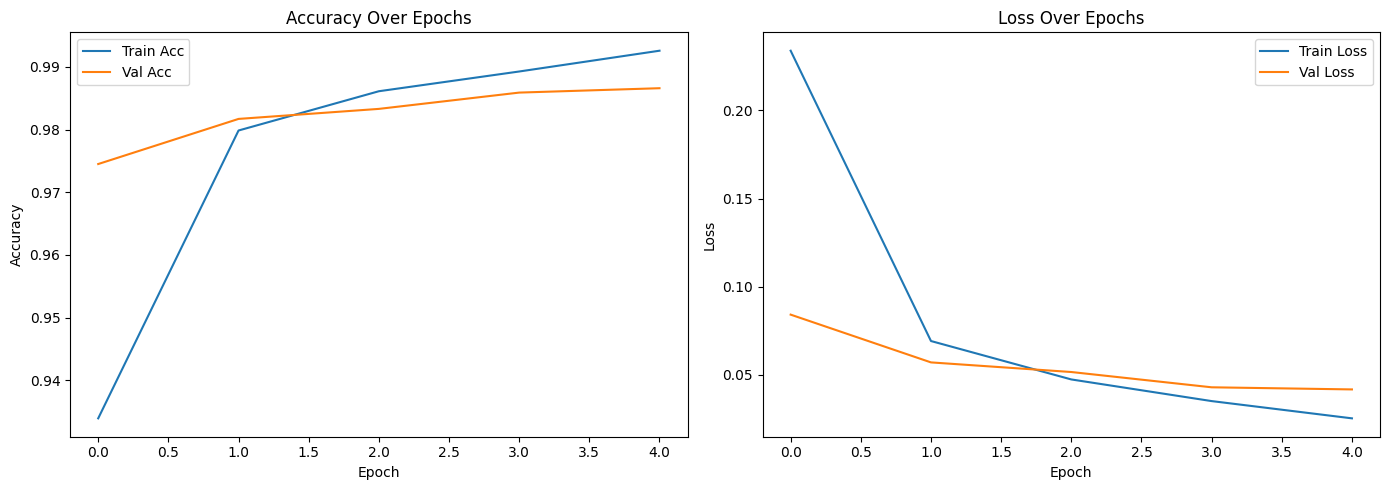

In [19]:
# Accuracy & Loss Graphs
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Over Epochs'); plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs'); plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
plt.tight_layout(); plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


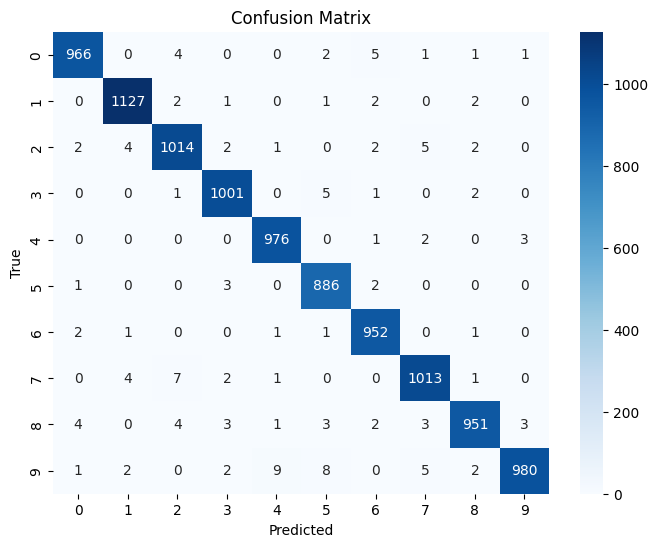

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [20]:
# Confusion Matrix & Classification Report
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_mat = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix'); plt.xlabel('Predicted'); plt.ylabel('True'); plt.show()
print(classification_report(y_test, y_pred_classes))

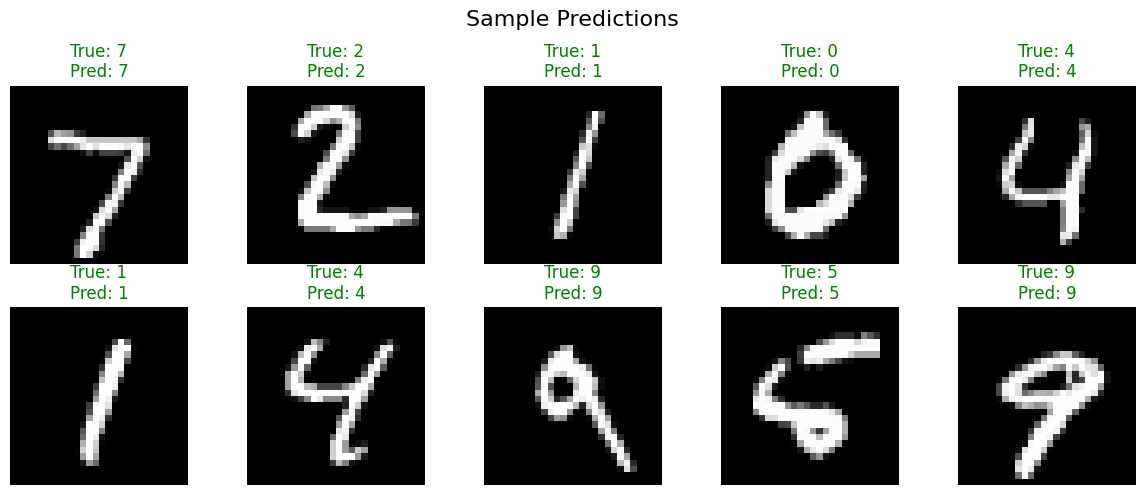

In [21]:
# Show Sample Predictions
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {y_pred_classes[i]}", 
              color='green' if y_test[i] == y_pred_classes[i] else 'red')
    plt.axis('off')
plt.suptitle('Sample Predictions', fontsize=16)
plt.tight_layout(); plt.show()